In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from PIL import Image

In [2]:
!unzip cats.zip
!unzip bird.zip


Archive:  cats.zip
  inflating: cats/1.jpg              
  inflating: cats/10.jpg             
  inflating: cats/11.jpg             
  inflating: cats/12.jpg             
  inflating: cats/13.jpg             
  inflating: cats/14.jpg             
  inflating: cats/15.jpg             
  inflating: cats/16.jpg             
  inflating: cats/17.jpg             
  inflating: cats/18.jpg             
  inflating: cats/19.jpg             
  inflating: cats/2.jpg              
  inflating: cats/20.jpg             
  inflating: cats/21.jpg             
  inflating: cats/22.jpg             
  inflating: cats/23.jpg             
  inflating: cats/24.jpg             
  inflating: cats/25.jpg             
  inflating: cats/26.jpg             
  inflating: cats/27.jpg             
  inflating: cats/28.jpg             
  inflating: cats/29.jpg             
  inflating: cats/3.jpg              
  inflating: cats/30.jpg             
  inflating: cats/31.jpg             
  inflating: cats/32.jpg       

In [3]:
pip install pillow

In [4]:
!unzip dogs.zip

Archive:  dogs.zip
  inflating: dogs/1.jpg              
  inflating: dogs/10.jpg             
  inflating: dogs/11.jpg             
  inflating: dogs/12.jpg             
  inflating: dogs/13.jpg             
  inflating: dogs/14.jpg             
  inflating: dogs/15.jpg             
  inflating: dogs/16.jpg             
  inflating: dogs/17.jpg             
  inflating: dogs/18.jpg             
  inflating: dogs/19.jpg             
  inflating: dogs/2.jpg              
  inflating: dogs/20.jpg             
  inflating: dogs/21.jpg             
  inflating: dogs/22.jpg             
  inflating: dogs/23.jpg             
  inflating: dogs/24.jpg             
  inflating: dogs/25.jpg             
  inflating: dogs/26.jpg             
  inflating: dogs/27.jpg             
  inflating: dogs/28.jpg             
  inflating: dogs/29.jpg             
  inflating: dogs/3.jpg              
  inflating: dogs/30.jpg             
  inflating: dogs/31.jpg             
  inflating: dogs/32.jpg       

In [5]:
import os
import cv2

In [7]:
x = [] #categories
y = []  #number
cat_folder = 'cats'
dogs_folder = 'dogs'
bird_folder = 'bird'
name_decode = {"cats": 0 , "dogs":1 , "bird": 2}
def img_to_array(folder  , name):
  for image in os.listdir(folder):
    image1 = Image.open(os.path.join(folder,image))
    resize_img = Image.Image.resize(image1 ,[100,100])
    array_img = np.array(resize_img)
    x.append(array_img)
    y.append(name_decode[name])

    flip = cv2.flip(array_img , 1)
    x.append(flip)
    y.append(name_decode[name])

    blur = cv2.blur(array_img,(2,2))
    x.append(blur)
    y.append(name_decode[name])
  
def show_img(index):
  plt.imshow(x[index])
  plt.show()
  print(y[index])

img_to_array(cat_folder , 'cats')
img_to_array(dogs_folder , 'dogs')
img_to_array(bird_folder , 'bird')
y = to_categorical(y , num_classes=3)
x = (np.array(x) - 127.5)/127.5




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


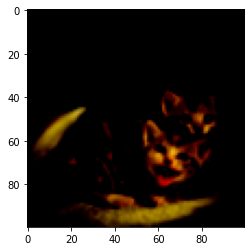

[1. 0. 0.]


In [8]:
show_img(68)

In [9]:
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPool2D , Flatten , Dropout , Activation , BatchNormalization 


In [39]:
model = Sequential()
model.add(Conv2D(32 , (5,5), padding='same' ,input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))

In [40]:
model.add(Conv2D(100 , (3,3), padding='same' ,input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(100 , (3,3), padding='same' ,input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(120 , (3,3), padding='same' ,input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(124))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))



In [41]:
from keras.optimizers import Adam

In [42]:
optimizer = Adam(learning_rate=0.001)
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0. 0.]


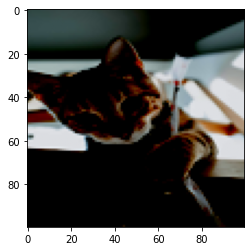

[1. 0. 0.]


In [15]:
print(y[40])
show_img(40)

In [44]:
model.compile(optimizer=optimizer  , loss ='categorical_crossentropy' , metrics=['accuracy'])
# from keras.callbacks import EarlyStopping
# earlyStop = EarlyStopping(monitor ='val_accuracy' , patience = 10 , mode='max')
model.fit(x_train , y_train , batch_size=13 , epochs=500 , validation_data=(x_test , y_test))

Epoch 1/500
32/32 [==============================] - 17s 462ms/step - loss: 1.8814 - accuracy: 0.4353 - val_loss: 2.5060 - val_accuracy: 0.4222
Epoch 2/500
32/32 [==============================] - 14s 431ms/step - loss: 1.4389 - accuracy: 0.6430 - val_loss: 1.2303 - val_accuracy: 0.5778
Epoch 3/500
32/32 [==============================] - 14s 438ms/step - loss: 1.3556 - accuracy: 0.6565 - val_loss: 2.0798 - val_accuracy: 0.6889
Epoch 4/500
32/32 [==============================] - 14s 437ms/step - loss: 1.3767 - accuracy: 0.6857 - val_loss: 1.7099 - val_accuracy: 0.6000
Epoch 5/500
32/32 [==============================] - 14s 431ms/step - loss: 0.6305 - accuracy: 0.7979 - val_loss: 0.8748 - val_accuracy: 0.7556
Epoch 6/500
32/32 [==============================] - 14s 431ms/step - loss: 0.8165 - accuracy: 0.7843 - val_loss: 0.8758 - val_accuracy: 0.8444
Epoch 7/500
32/32 [==============================] - 14s 437ms/step - loss: 0.2547 - accuracy: 0.9187 - val_loss: 0.6417 - val_accuracy:

KeyboardInterrupt: ignored

In [45]:
model.save('cnn_class3_new.h5')

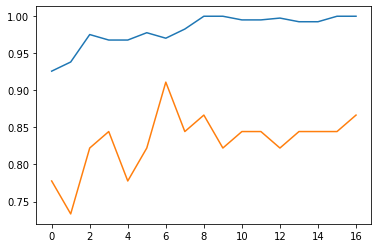

In [36]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

In [ ]:
model.predict_classes(x_test)

In [ ]:
# def prediction(index):
#   array = (np.array(x[index])-127.5)/127.5
#   array = array.reshape(1,100,100,3)
#   prediction = model.predict_classes(array)
#   print(prediction[0])
#   plt.imshow(x[index])
#   plt.show()
  

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Its a cat


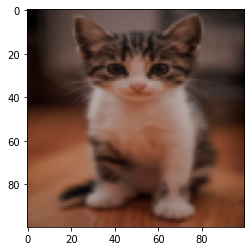

In [48]:
from keras.models import load_model
model = load_model('cnn_class3_new.h5')

img = Image.open('cat 2.jpg')
plt.imshow(img)
img1 =Image.Image.resize(img,[100,100])
img2 = (np.array(img1)-127.5)/127.5
filtered_img = img2.reshape(1,100,100,3)
predict = model.predict_classes(filtered_img )
if predict == 0:
  print('Its a cat')
  plt.imshow(img1)
elif predict == 2:
  print('Its a bird')
  plt.imshow(img1)
else:
  print('Its a dog')
  plt.imshow(img1)


